This implementation transforms RGB images to Ycbcr image and then Giveout the output as DCT transformed images.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal,misc
import cv2
import math
import pandas as pd
import os
import tensorflow as tf
from skimage import transform
import tensorflow as tf
from PIL import Image
#!pip install tensorflow-io

In [ ]:
block_size = 8
QUANTIZATION_TABLE = np.array([[16,11,10,16,24,40,51,61],
                             [12,12,14,19,26,58,60,55],
                             [14,13,16,24,40,57,69,56 ],
                             [14,17,22,29,51,87,80,62],
                             [18,22,37,56,68,109,103,77],
                             [24,35,55,64,81,104,113,92],
                             [49,64,78,87,103,121,120,101],
                             [72,92,95,98,112,100,103,99]])

In [ ]:
#Giving folder path and changing current directory to given folder path
train_dir = "/content/drive/MyDrive/MiniProject/ManualDataset/"
os.chdir(train_dir)
train_images = os.listdir(train_dir)
  

In [ ]:
print(train_images)

['ap10.jpg', 'ap1.jpg', 'ap4.jpg', 'ap11.jpg', 'ap14.jpg', 'ap12.jpg', 'ap2.jpg', 'ap13.jpg', 'ap3.jpg', 'ap8.jpg', 'ap6.jpg', 'ap7.jpg', 'ap9.jpg', 'ap5.jpg', 'ap1_m.png', 'ap2_m.png', 'ap3_m.png', 'ap4_m.png', 'ap5_m.png', 'ap6_m.png', 'ap7_m.png', 'ap8_m.png', 'ap9_m.png', 'ap10_m.png', 'ap14_m.png', 'ap13_m.png', 'ap12_m.png', 'ap11_m.png', 'ap15.jpg', 'ap26.jpg', 'ap25.jpg', 'ap27.jpg', 'ap24.jpg', 'ap17.jpg', 'ap18.jpg', 'ap28.jpg', 'ap20.jpg', 'ap16.jpg', 'ap19.jpg', 'ap22.jpg', 'ap21.jpg', 'ap23.jpg', 'ap29.jpg', 'ap31.jpg', 'ap30.jpg', 'ap15_m.png', 'ap16_m.png', 'ap17_m.png', 'ap18_m.png', 'ap19_m.png', 'ap20_m.png', 'ap21_m.png', 'ap22_m.png', 'ap23_m.png', 'ap24_m.png', 'ap25_m.png', 'ap26_m.png', 'ap27_m.png', 'ap28_m.png', 'ap29_m.png', 'ap30_m.png', 'ap31_m.png', 'ap90.jpg', 'ap72.jpg', 'ap71.jpg', 'ap91.jpg', 'ap82.jpg', 'ap62.jpg', 'ap69.jpg', 'ap73.jpg', 'ap70.jpg', 'ap89.jpg', 'ap87.jpg', 'ap68.jpg', 'ap88.jpg', 'ap84.jpg', 'ap74.jpg', 'ap85.jpg', 'ap86.jpg', 'ap65.j

In [ ]:
print(len(train_images))

290


In [ ]:
#This function applies dct(Discrete Cosine Transformation) over the given image in 8 x 8 blocks
def apply_dct(img):
    height, width = img.shape
    h = height/block_size
    w = width/block_size
    h = np.int32(h)
    w = np.int32(w)
    final_out = np.zeros((height,width))
    for i in range(h):
        start_row = i*block_size
        end_row = (i+1)*block_size
        for j in range(w):
            start_col = j*block_size
            end_col = (j+1)*block_size
            
            block = img[start_row:end_row,start_col:end_col]
            
            block_dct = cv2.dct(block)
            
            final_out[start_row:end_row,start_col:end_col] = block_dct
    
    return final_out

In [ ]:
#This function downsample the image to make same dimensions of each channel
def downsample_image(img,skip):
    return img[::skip,::skip]

In [ ]:
#This function converts RGB into YCbCr format
def rgbToycbcr(r,g,b):
    Y = 16 + ((65.481/255)*r + (128.553/255)*g + (24.966/255)*b)
    Cb = 128 + ((-37.797/255)*r + (-74.203/255)*g + (112.000/255)*b)
    Cr = 128 + ((112.000/255)*r + (-93.786/255)*g + (-18.214/255)*b)
    return Y,Cb,Cr

In [ ]:
from scipy import ndimage, misc
import matplotlib.pyplot as plt

In [ ]:
#This function upsample the image to make same dimensions of each channel
def upsample_image(img,factor):
    result = ndimage.zoom(img, factor)
    return result

In [ ]:
def padImage(img):
    height, width = img.shape
    height = np.float32(height)
    width = np.float32(width)
    h = math.ceil(height/block_size)
    h = np.int32(h)
    w = math.ceil(width/block_size)
    w = np.int32(w)
    
    height = np.int32(height)
    width = np.int32(width)
    
    H = h*block_size
    W = w*block_size
    
    padded_img = np.zeros((H,W))
    padded_img[0:height,0:width] = img[0:height,0:width]
    return padded_img

In [ ]:
batch_list= train_images

In [ ]:
print((batch_list))

['ap10.jpg', 'ap1.jpg', 'ap4.jpg', 'ap11.jpg', 'ap14.jpg', 'ap12.jpg', 'ap2.jpg', 'ap13.jpg', 'ap3.jpg', 'ap8.jpg', 'ap6.jpg', 'ap7.jpg', 'ap9.jpg', 'ap5.jpg', 'ap1_m.png', 'ap2_m.png', 'ap3_m.png', 'ap4_m.png', 'ap5_m.png', 'ap6_m.png', 'ap7_m.png', 'ap8_m.png', 'ap9_m.png', 'ap10_m.png', 'ap14_m.png', 'ap13_m.png', 'ap12_m.png', 'ap11_m.png', 'ap15.jpg', 'ap26.jpg', 'ap25.jpg', 'ap27.jpg', 'ap24.jpg', 'ap17.jpg', 'ap18.jpg', 'ap28.jpg', 'ap20.jpg', 'ap16.jpg', 'ap19.jpg', 'ap22.jpg', 'ap21.jpg', 'ap23.jpg', 'ap29.jpg', 'ap31.jpg', 'ap30.jpg', 'ap15_m.png', 'ap16_m.png', 'ap17_m.png', 'ap18_m.png', 'ap19_m.png', 'ap20_m.png', 'ap21_m.png', 'ap22_m.png', 'ap23_m.png', 'ap24_m.png', 'ap25_m.png', 'ap26_m.png', 'ap27_m.png', 'ap28_m.png', 'ap29_m.png', 'ap30_m.png', 'ap31_m.png', 'ap90.jpg', 'ap72.jpg', 'ap71.jpg', 'ap91.jpg', 'ap82.jpg', 'ap62.jpg', 'ap69.jpg', 'ap73.jpg', 'ap70.jpg', 'ap89.jpg', 'ap87.jpg', 'ap68.jpg', 'ap88.jpg', 'ap84.jpg', 'ap74.jpg', 'ap85.jpg', 'ap86.jpg', 'ap65.j

In [ ]:
#This functions takes images of folder as input (batch_list) and stores the dct form of images into array (images)
images_before_dct = []
def load_data(batch_list):
    global train_images
    images = []
    for img in batch_list:
        image = plt.imread(img)
        print(image.shape)
        red = image[:,:,0]
        green = image[:,:,1]
        blue = image[:,:,2]
        #print(red, green, blue)
        Y,Cb,Cr = rgbToycbcr(red,green,blue)
        x = np.ones(Y.shape)*128
        Y = Y-x
        print(Y.shape,Cb.shape,Cr.shape);
        Y = downsample_image(Y,2)
        Cb = downsample_image(Cb,2)
        Cr = downsample_image(Cr,2)
        pad_Y = padImage(Y)
        pad_Cb = padImage(Cb)
        pad_Cr = padImage(Cr)
        print(pad_Y.shape,pad_Cb.shape,pad_Cr.shape);
        ans = np.zeros((512,328,3))
        ans[:,:,0] = pad_Y
        ans[:,:,1] = pad_Cb
        ans[:,:,2] = pad_Cr
        images_before_dct.append(ans)
        final_Y = apply_dct(pad_Y)
        final_Cb = apply_dct(pad_Cb)
        final_Cr = apply_dct(pad_Cr)
        #final_Y = downsample_image(final_Y,2)
        print(final_Y.shape,final_Cb.shape,final_Cr.shape);
        print()
        ans = np.zeros((512,328,3))
        ans[:,:,0] = final_Y
        ans[:,:,1] = final_Cb
        ans[:,:,2] = final_Cr

        images.append(ans)
    #print(len(images))
    return images 

In [ ]:
#load_data(batch_list)
images = load_data(batch_list) 
#print(len(images))

In [ ]:
print(images[3].shape)
print(images[3].dtype)
print(images[3])


In [ ]:
#Providing path of folder in which we want to save converted image
path = "/content/drive/MyDrive/MiniProject/DCTtransform/output/"
os.chdir(path)  #Changing the directory to which we want to save the converted image
#This for loop iterates over the images array which we get from load_data function and saves all images in target folder provided above
for i in range(len(images)):
  data = Image.fromarray((images[i] * 255).astype(np.uint8))
 # data = data.astype(np.float64)
  newpath = path + batch_list[i]
  #print(newpath)
  data.save(newpath)

In [ ]:
#Prints number of files in given folder
onlyfiles = next(os.walk("/content/drive/MyDrive/MiniProject/DCTtransform/output/"))[2] 
print(len(onlyfiles))

48


In [ ]:
 im = Image.open("/content/drive/MyDrive/MiniProject/DCTtransform/original/ap1.jpg")
 np_im = np.array(im)
 print(np_im.shape)
 print(np_im.dtype)
 print(np_im)

(1024, 645, 3)
uint8
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 253]
  [241 241 239]
  [176 176 174]
  ...
  [253 253 253]
  [254 254 254]
  [254 254 254]]

 [[246 246 244]
  [238 238 236]
  [208 208 206]
  ...
  [253 253 253]
  [255 255 255]
  [253 253 253]]

 [[253 253 251]
  [253 253 251]
  [255 255 253]
  ...
  [254 254 254]
  [255 255 255]
  [252 252 252]]]


In [ ]:
 im = Image.open("/content/drive/MyDrive/MiniProject/DCTtransform/output/ap1.jpg")
 np_im = np.array(im)
 print(np_im.shape)
 print(np_im.dtype)
 print(np_im)

(512, 328, 3)
uint8
[[[ 43  34  37]
  [ 18   9  12]
  [  6   0   0]
  ...
  [119 107 111]
  [ 58  32  41]
  [255 242 247]]

 [[ 21  12  15]
  [  7   0   1]
  [  6   0   0]
  ...
  [  4   0   1]
  [  7   0   0]
  [ 13   4   7]]

 [[  6   0   0]
  [  6   0   0]
  [  6   0   0]
  ...
  [  0   5   2]
  [ 12  21  18]
  [  0   1   0]]

 ...

 [[193  96 201]
  [207 114 159]
  [139  62  46]
  ...
  [187  23  24]
  [173   4   9]
  [130   0   0]]

 [[ 48  29  25]
  [ 67   7   0]
  [121  44  28]
  ...
  [161  26  33]
  [160  30  38]
  [103   0   0]]

 [[ 70 152   0]
  [144 120  46]
  [100   0   1]
  ...
  [ 84   0   0]
  [141  38  41]
  [ 95   7   6]]]


[[ 8.52564706e+02 -2.00925531e+00  6.43217892e-01 ... -5.67304443e+01
   4.22975797e+01  6.29963058e+01]
 [ 3.35688313e+00  2.33162821e+00 -1.86146334e-01 ... -1.46661774e+01
  -9.72454843e+00 -4.85727681e+00]
 [-2.32395972e-01 -1.10448262e+00 -9.29338765e-01 ...  8.51618144e+00
   5.22584980e+00  2.38403968e+00]
 ...
 [-6.67410982e+01  2.48180959e+01  3.00506303e+00 ... -2.05694100e+00
  -1.20813299e+00 -5.44806139e-01]
 [ 2.61750887e+01 -1.92081943e+00 -9.73302142e-02 ... -4.38360587e-01
  -1.33784526e-01 -1.09204685e-02]
 [-4.52331278e+01 -1.66032394e+01  1.58377886e+01 ... -2.62877501e-01
  -1.21464432e-01 -4.16172365e-02]]


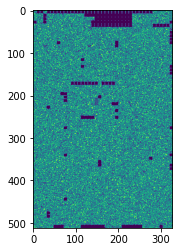

In [ ]:
plt.imshow((images[3][:,:,0] * 255).astype(np.uint8))
print(images[3][:,:,0])

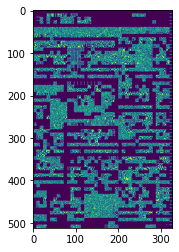

In [ ]:
 plt.imshow((images[3][:,:,1] * 255).astype(np.uint8))

In [ ]:
# pil_img = Image.fromarray((images[0] * 128).astype(np.uint8))
# pil_img.save('image_save.jpg')

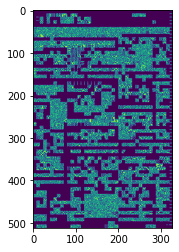

In [ ]:
plt.imshow((images[3][:,:,2] * 255).astype(np.uint8))

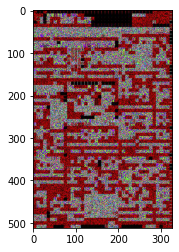

In [ ]:
image = plt.imread(batch_list[3])
plt.imshow(image)

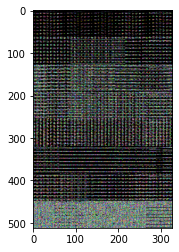

In [ ]:
image = Image.fromarray(images[6],"RGB")
plt.imshow(image)

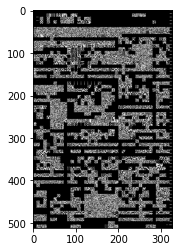

In [ ]:
an_image = Image.fromarray((images[3][:,:,2] * 255).astype(np.uint8))

grayscale_image = an_image.convert("L")
grayscale_array = np.asarray(grayscale_image)

plt.imshow(grayscale_array, cmap="gray")
